<a href="https://colab.research.google.com/github/nayyabRz/MEC_20S19832/blob/main/Waste_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d techsash/waste-classification-data

100% 426M/427M [00:21<00:00, 22.1MB/s]
100% 427M/427M [00:21<00:00, 21.1MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/waste-classification-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DATASET/TRAIN',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DATASET/TEST',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
706/706 [==============================] - 72s 97ms/step - loss: 1.4716 - accuracy: 0.7631 - val_loss: 0.3254 - val_accuracy: 0.8782
Epoch 2/10
706/706 [==============================] - 69s 96ms/step - loss: 0.4161 - accuracy: 0.8306 - val_loss: 0.4054 - val_accuracy: 0.7819
Epoch 3/10
706/706 [==============================] - 68s 96ms/step - loss: 0.3709 - accuracy: 0.8513 - val_loss: 0.2941 - val_accuracy: 0.8890
Epoch 4/10
706/706 [==============================] - 68s 95ms/step - loss: 0.3616 - accuracy: 0.8562 - val_loss: 0.2679 - val_accuracy: 0.8965
Epoch 5/10
706/706 [==============================] - 70s 98ms/step - loss: 0.3351 - accuracy: 0.8634 - val_loss: 0.2650 - val_accuracy: 0.9017
Epoch 6/10
706/706 [==============================] - 69s 98ms/step - loss: 0.3193 - accuracy: 0.8745 - val_loss: 0.2892 - val_accuracy: 0.8874
Epoch 7/10
706/706 [==============================] - 69s 98ms/step - loss: 0.2832 - accuracy: 0.8883 - val_loss: 0.2461 - val_accuracy:

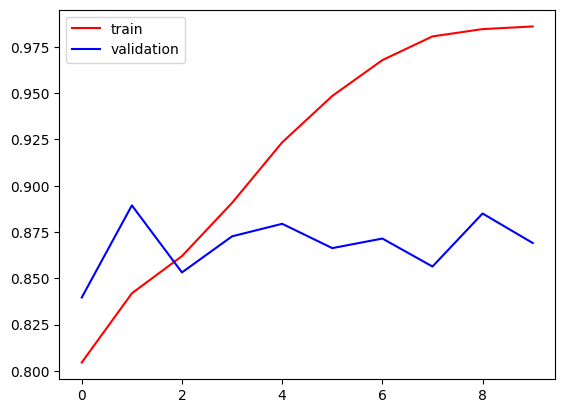

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

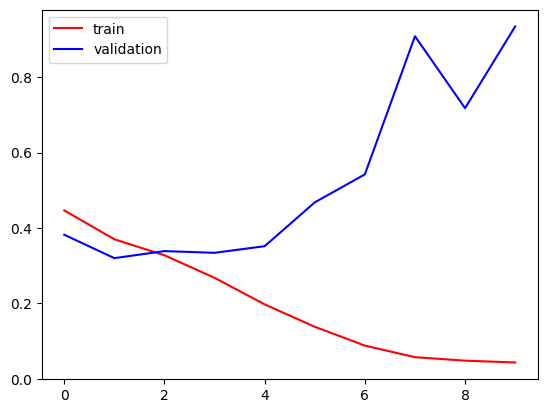

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

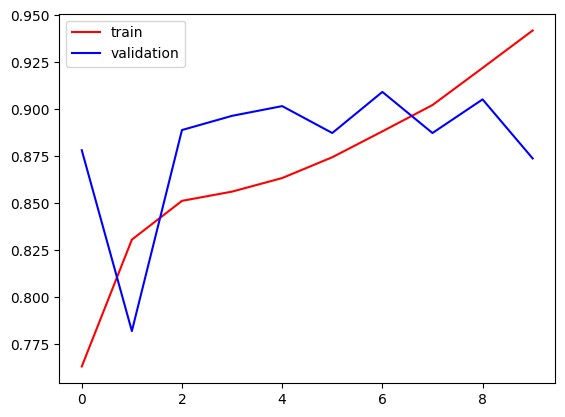

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

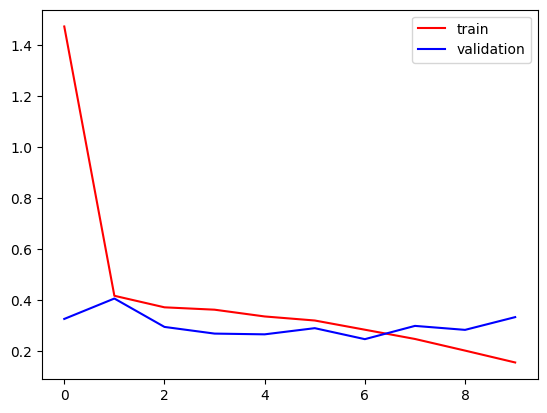

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()